In [1]:
import pprint
import numpy as np
from numpy import linalg as LA
def pivot_matrix(M):
    
    m = len(M)

                                                                                                                                                                        
    id_mat = [[float(i ==j) for i in range(m)] for j in range(m)]

                                                                                                                                                                                         
    for j in range(m):
        row = max(range(j, m), key=lambda i: abs(M[i][j]))
        if j != row:
                                                                                                                                                                                                                   
            id_mat[j], id_mat[row] = id_mat[row], id_mat[j]

    return id_mat

def lu_decomposition(A):
  
    n = len(A)

                                                                                                                                                                                                         
    L = [[0.0] * n for i in range(n)]
    U = [[0.0] * n for i in range(n)]
 

                                                                                                                                                                                 
    P = pivot_matrix(A)
    PA = np.dot(P, A)

                                                                                                                                                                                                          
    for j in range(n):
                                                                                                                                                                                                        
        L[j][j] = 1.0

                                                                                                                                                                                           
        for i in range(j+1):
            s1 = sum(U[k][j] * L[i][k] for k in range(i))
            U[i][j] = PA[i][j] - s1

        
        for i in range(j, n):
            s2 = sum(U[k][j] * L[i][k] for k in range(j))
           
            L[i][j] = (PA[i][j] - s2) / U[j][j]

    return (P, L, U)





In [53]:
m=1
i=4
time_LUP=[]
j = np.arange(0, 5, 1)
from time import perf_counter
while i < 5: 
    C = []
    sum_1=0
    A = np.random.randint(1, 10, (i, i))
    C = [list(A[0])]
    m = 1
    while m < len(A):
        
        C = C + [list(A[m])]
        m += 1
    for _ in j:
        t0 = 0
        t1 = 0
        t0 = perf_counter()
        G= lu_decomposition(C)
        t1 = perf_counter()
        sum_1 = sum_1 + (t1 - t0)
    time_LUP.append(sum_1/5)

    i += 1
    

In [67]:
from numpy import linalg as LA

In [68]:
A

array([[8, 8, 8, 8],
       [3, 1, 7, 4],
       [6, 7, 6, 8],
       [6, 2, 1, 2]])

In [69]:
P, L, U=lu_decomposition(A)

In [70]:
P_inv = LA.inv(P)

In [78]:
P_inv

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [76]:
L

[[1.0, 0.0, 0.0, 0.0],
 [0.75, 1.0, 0.0, 0.0],
 [0.375, -2.0, 1.0, 0.0],
 [0.75, -4.0, -1.25, 1.0]]

In [72]:
U

[[8.0, 8.0, 8.0, 8.0],
 [0.0, 1.0, 0.0, 2.0],
 [0.0, 0.0, 4.0, 5.0],
 [0.0, 0.0, 0.0, 10.25]]

In [77]:
P

[[1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0]]

In [74]:
LU = np.dot(L, U)

In [79]:
LU

array([[8., 8., 8., 8.],
       [6., 7., 6., 8.],
       [3., 1., 7., 4.],
       [6., 2., 1., 2.]])

In [75]:
np.dot(P_inv, LU)

array([[8., 8., 8., 8.],
       [3., 1., 7., 4.],
       [6., 7., 6., 8.],
       [6., 2., 1., 2.]])

In [18]:
t_1 = lambda x: pow(x, 3)*pow(10, -6)*0.14
x = np.arange(4, 500, 1)
import matplotlib.pyplot as plt

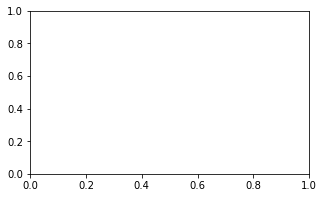

In [19]:
fig, ax = plt.subplots(figsize=(5, 3))

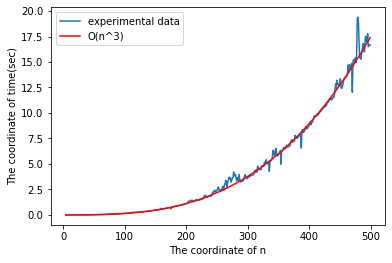

In [21]:
plt.plot(x,time_LUP)
plt.plot(x, t_1(x), 'r-')
plt.xlabel('The coordinate of n')
plt.ylabel('The coordinate of time(sec)')
plt.legend(["experimental data", "O(n^3)"], loc ="upper left")

In [281]:
# Закодируйте любую строку по алгоритму Хаффмана.
from collections import Counter


class Node:

    def __init__(self, value, left=None, right=None):
        self.right = right
        self.left = left
        self.value = value


def get_code(root, codes=dict(), code=''):

    if root is None:
        return

    if isinstance(root.value, str):
        codes[root.value] = code
        return codes

    get_code(root.left, codes, code + '0')
    get_code(root.right, codes, code + '1')

    return codes


def get_tree(string):
    string_count = Counter(string)

    if len(string_count) <= 1:
        node = Node(None)

        if len(string_count) == 1:
            node.left = Node([key for key in string_count][0])
            node.right = Node(None)

        string_count = {node: 1}

    while len(string_count) != 1:
        node = Node(None)
        spam = string_count.most_common()[:-3:-1]

        if isinstance(spam[0][0], str):
            node.left = Node(spam[0][0])

        else:
            node.left = spam[0][0]

        if isinstance(spam[1][0], str):
            node.right = Node(spam[1][0])

        else:
            node.right = spam[1][0]

        del string_count[spam[0][0]]
        del string_count[spam[1][0]]
        string_count[node] = spam[0][1] + spam[1][1]

    return [key for key in string_count][0]


def coding(string, codes):
    res = ''

    for symbol in string:
        res += codes[symbol]

    return res


def decoding(string, codes):
    res = ''
    i = 0

    while i < len(string):

        for code in codes:

            if string[i:].find(codes[code]) == 0:
                res += code
                i += len(codes[code])

    return res


my_string = input('Введите строку для сжатия: ')
#my_string = '321'
#my_string = my_string[0]
tree = get_tree(my_string)

codes = get_code(tree)
print(f'Шифр: {codes}')

coding_str = coding(my_string, codes)
print('Сжатая строка: ', coding_str)

decoding_str = decoding(coding_str, codes)
print('Исходная строка: ', decoding_str)

if my_string == decoding_str:
    print('Успешно!')
else:
    print('Ошибка!')

Введите строку для сжатия: Сложность картины электрической активности нейронных ансамблей обусловлена взаимодействием их элементов. Разветвления аксона заканчиваются в непосредственной близости от поверхности тел или дендритов других нейронов. Спайк генерируется в центральной части нейрона — в теле. Рожденный нейроном спайк, распространяясь по аксону и его разветвлениям, достигает синапсов. В бутоне — пресинаптической части — под действием пришедшего нервного импульса генерируется выброс заключенных в пузырьки белков — медиаторов. Они оказывают возбуждающее или тормозное воздействие на часть мембраны, называемую постсинаптической. В зависимости от типа выделяемого медиатора синапсы делятся на возбудительные и тормозные. В синапсах количество медиатора, вырабатываемого в ответ на раздражение, быстро нарастает, относительно стабилизируется, а после окончания импульса медиатор распадается. Возбудительное воздействие может вызвать у постсинаптического нейрона спайк или приблизить момент на

Исходная строка:  Сложность картины электрической активности нейронных ансамблей обусловлена взаимодействием их элементов. Разветвления аксона заканчиваются в непосредственной близости от поверхности тел или дендритов других нейронов. Спайк генерируется в центральной части нейрона — в теле. Рожденный нейроном спайк, распространяясь по аксону и его разветвлениям, достигает синапсов. В бутоне — пресинаптической части — под действием пришедшего нервного импульса генерируется выброс заключенных в пузырьки белков — медиаторов. Они оказывают возбуждающее или тормозное воздействие на часть мембраны, называемую постсинаптической. В зависимости от типа выделяемого медиатора синапсы делятся на возбудительные и тормозные. В синапсах количество медиатора, вырабатываемого в ответ на раздражение, быстро нарастает, относительно стабилизируется, а после окончания импульса медиатор распадается. Возбудительное воздействие может вызвать у постсинаптического нейрона спайк или приблизить момент начала спай

In [ ]:
while i < 5: 
    C = []
    sum_1=0
    A = np.random.randint(1, 10, (i, i))
    C = [list(A[0])]
    m = 1
    while m < len(A):
        
        C = C + [list(A[m])]
        m += 1
    for _ in j:
        t0 = 0
        t1 = 0
        t0 = perf_counter()
        G= lu_decomposition(C)
        t1 = perf_counter()
        sum_1 = sum_1 + (t1 - t0)
    time_LUP.append(sum_1/5)

    i += 1

In [411]:
time = []
sum_1 = 0
for i in range(len(my_string)):
    sum_1=0
    for _ in j:
        t0 = 0
        t1 = 0
        t0 = perf_counter()
        tree = get_tree(my_string[i])
        codes = get_code(tree)
        coding_str = coding(my_string[i], codes)
    
        t1 = perf_counter()
        sum_1 = sum_1 + (t1 - t0)
        
    
    time.append(sum_1/5)

In [422]:
t = lambda x: pow(x, 1)*np.log(x)*pow(10, -8)*0.02 +0.000007
x = np.arange(10, len(my_string), 1)

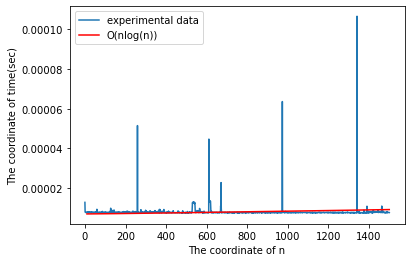

In [424]:
plt.plot(range(len(my_string)),time)
plt.plot(x, t(x), 'r-')
plt.xlabel('The coordinate of n')
plt.ylabel('The coordinate of time(sec)')
plt.legend(["experimental data", "O(nlog(n))"], loc ="upper left")

In [421]:
len(my_string)

1501

In [95]:
np.log(10)

2.302585092994046